In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [62]:
# Create engine and load data
engine = create_engine('sqlite:///../notebooks/churn_data2.db')
df = pd.read_sql("SELECT * FROM churn", engine)


In [63]:
# Feature engineering
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']


In [64]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [66]:
# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [67]:
# Best parameters
best_rf = grid_search.best_estimator_


In [68]:
# Train the model
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [69]:
# Predictions
y_pred = best_rf.predict(X_test)


In [70]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)


In [71]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.33%


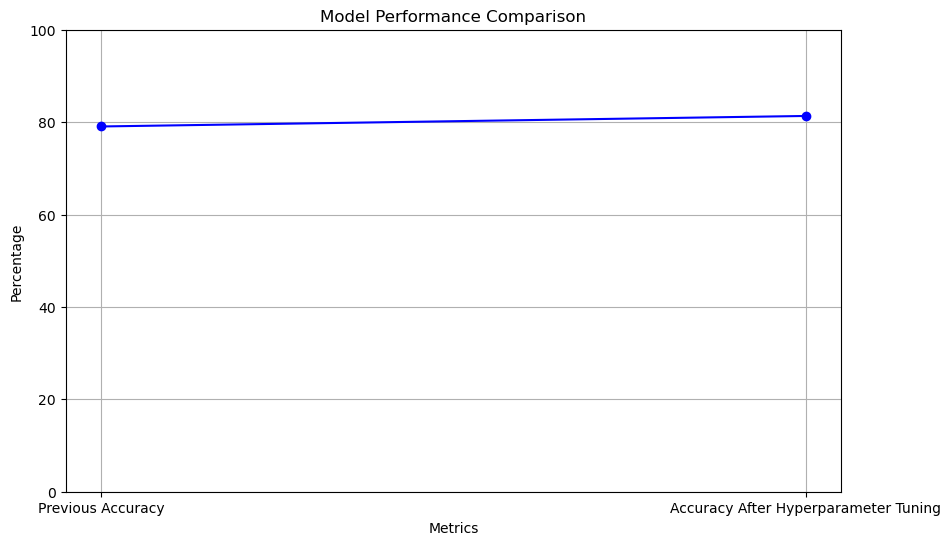

In [78]:
# Previous accuracy
previous_accuracy = 79.06

# metrics and values
metrics = ['Previous Accuracy', 'Accuracy After Hyperparameter Tuning']
values = [previous_accuracy, accuracy * 100]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(True)
plt.show()